# Estimación de Modelos

In [8]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.3                         
year           2024                        
month          02                          
day            29                          
svn rev        86002                       
language       R                           
version.string R version 4.3.3 (2024-02-29)
nickname       Angel Food Cake             

In [9]:
# Installing packages
# we recommend running this is a fresh R session or restarting your current session
#install.packages("cmdstanr", repos = c('https://stan-dev.r-universe.dev', getOption("repos")))
install.packages("tidyr")


Installing package into ‘/home/quicho/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [10]:
# Librerias

## Bayes libreria
library(cmdstanr)
library(posterior)
library(bridgesampling)

# Gráficos
library(repr)
library(bayesplot)
library(ggplot2)
color_scheme_set("teal")


## Menjo de Datos
library(dplyr)
library(tidyr)
library(reshape2)

This is cmdstanr version 0.9.0

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /home/quicho/.cmdstan/cmdstan-2.36.0

- CmdStan version: 2.36.0

This is posterior version 1.6.1


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


This is bayesplot version 1.11.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting


Attaching package: ‘bayesplot’


The following object is masked from ‘package:posterior’:

    rhat



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape2’


The following objec

In [11]:
# check_cmdstan_toolchain()
# install_cmdstan(cores = 2)

In [12]:
cmdstan_path() # Para checar que se instalo

[1] "/home/quicho/.cmdstan/cmdstan-2.36.0"

In [13]:
cmdstan_version()

[1] "2.36.0"

## Arreglo de Datos

In [14]:
datos <- read.csv("COVID19MEXICO2022_muestra_clean.csv")

head(datos)

,sexo,tipo_paciente,fecha_ingreso,fecha_sintomas,fecha_def,neumonia,edad,nacionalidad,indigena,diabetes,⋯,otra_com,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,defuncion,fin_ano,tiempo,event
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<chr>
1,2,2,2022-06-21,2022-06-14,2022-06-30,2,82,1,2,2,⋯,2,2,2,2,2,1,1,2022-12-31,16,True
2,2,2,2022-02-02,2022-02-01,2022-02-11,2,86,1,2,1,⋯,2,2,2,2,2,2,1,2022-12-31,10,True
3,2,2,2022-02-07,2022-01-31,2022-02-10,1,81,1,2,1,⋯,2,2,2,2,2,2,1,2022-12-31,10,True
4,2,2,2022-07-21,2022-07-18,2022-07-22,1,65,1,2,1,⋯,1,2,2,2,1,2,1,2022-12-31,4,True
5,2,2,2022-01-29,2022-01-26,2022-01-30,1,75,1,2,2,⋯,2,2,2,2,2,1,1,2022-12-31,4,True
6,2,2,2022-01-17,2022-01-15,2022-01-20,2,90,1,2,2,⋯,2,2,2,2,2,2,1,2022-12-31,5,True


In [15]:
cat(names(datos), sep = "," )

sexo,tipo_paciente,fecha_ingreso,fecha_sintomas,fecha_def,neumonia,edad,nacionalidad,indigena,diabetes,epoc,asma,inmusupr,hipertension,otra_com,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,defuncion,fin_ano,tiempo,event

In [16]:
# Quitamos lo que no se va a usar
data_ord <- datos %>%
                select(-c(fecha_ingreso,fecha_sintomas,fecha_def,nacionalidad,indigena,fin_ano,event))

In [17]:
# Ordenamos por tiempo
data_ord <- data_ord %>%
                mutate(tiempo = if_else(tiempo == 0 , 0.1, tiempo)) %>%
                arrange(tiempo)
head(data_ord)

,sexo,tipo_paciente,neumonia,edad,diabetes,epoc,asma,inmusupr,hipertension,otra_com,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,defuncion,tiempo
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2,2,1,41,2,2,2,2,2,2,2,2,2,2,1,1,0.1
2,2,2,1,96,2,2,2,2,2,2,2,2,2,2,2,1,0.1
3,2,2,2,58,1,2,2,2,1,2,2,2,2,2,2,1,0.1
4,2,2,1,67,2,2,2,2,2,2,2,1,2,1,2,1,0.1
5,2,2,1,45,2,2,2,2,2,2,2,2,2,2,2,1,0.1
6,1,2,1,88,1,2,2,2,1,2,1,2,1,2,2,1,0.1


In [18]:
tail(data_ord)

,sexo,tipo_paciente,neumonia,edad,diabetes,epoc,asma,inmusupr,hipertension,otra_com,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,defuncion,tiempo
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
2887,1,1,2,53,1,2,2,2,1,2,2,2,2,2,1,0,364
2888,1,1,2,35,2,2,2,2,2,2,2,2,2,2,1,0,364
2889,1,1,2,65,2,2,2,2,2,2,2,2,2,2,2,0,364
2890,2,1,2,49,2,2,2,2,2,2,2,2,2,2,2,0,364
2891,2,1,2,30,2,2,2,2,2,2,2,2,2,2,2,0,364
2892,1,1,2,57,1,2,2,2,1,2,2,1,2,2,2,0,364


In [19]:
# Verificamos NA
print(apply(data_ord, 2, function(x) sum(is.na(x)) ))

          sexo  tipo_paciente       neumonia           edad       diabetes 
             0              0             10              0             10 
          epoc           asma       inmusupr   hipertension       otra_com 
            10              9              9              9             28 
cardiovascular       obesidad  renal_cronica     tabaquismo      otro_caso 
            11              9             10             11             60 
     defuncion         tiempo 
             0              0 


In [20]:
# Quitmaos los na
data_ord <- data_ord %>%
                drop_na()

In [21]:
# Verificamos NA
print(apply(data_ord, 2, function(x) sum(is.na(x)) ))

          sexo  tipo_paciente       neumonia           edad       diabetes 
             0              0              0              0              0 
          epoc           asma       inmusupr   hipertension       otra_com 
             0              0              0              0              0 
cardiovascular       obesidad  renal_cronica     tabaquismo      otro_caso 
             0              0              0              0              0 
     defuncion         tiempo 
             0              0 


In [ ]:
# Tiempos para datos no censurados
tiempo.no.cen <- data_ord %>%
                    filter(defuncion == 1) %>%
                    select(tiempo) %>%
                    as.vector() %>%
                    unname() %>%
                    unlist()

tiempo.cen <- data_ord %>%
                    filter(defuncion == 0) %>%
                    select(tiempo) %>%
                    as.vector() %>%
                    unname() %>%
                    unlist()

cov.no.cen <- data_ord %>%
                    filter(defuncion == 1) %>%
                    select(-c(tiempo, defuncion))

cov.cen <- data_ord %>%
                    filter(defuncion == 0) %>%
                    select(-c(tiempo, defuncion))
# Number of cov
K <- dim(cov.cen)[2]

# N no censurados
N <- dim(cov.no.cen)[1]

# N censurados
N_cen <- dim(cov.cen)[1]

In [25]:
print(c(K, N, N_cen, length(tiempo.cen), length(tiempo.no.cen)))

[1]   15  462 2357 2357  462


## Modelo Exponencial

### Modelo Exponencial en Stan

In [21]:
write("
data {
  int<lower=0> N;
  vector[N] t;
  int<lower=0> N_cens;
  vector[N_cens] t_cens;
  int<lower=0> K;
  matrix[N, K] x;
  matrix[N_cens, K] x_cens;
}
parameters {
  vector[K] beta;
}
model {
  beta ~ normal(0, 5);

  t ~ exponential(exp(x * beta));
  target += exponential_lccdf(t_cens | exp(x_cens * beta));
}

", 
file = "exp_model.stan")

In [22]:
# Compilamos el modelo
modelo_exp <- cmdstan_model(stan_file = "exp_model.stan")

In [23]:
# Datos para el modelo en Stan
data_list <- list(
    N = N,
    t = tiempo.no.cen,
    N_cens = N_cen,
    t_cens = tiempo.cen,
    K = K,
    x = cov.no.cen,
    x_cens = cov.cen
)

In [24]:
# Corremos la simulación
fit <- modelo_exp$sample(
    data = data_list,
    chains = 4,
    seed = 2365428,
    refresh = 500,
    iter_warmup = 1000,
    iter_sampling = 7500
)

Running MCMC with 4 sequential chains...

Chain 1 Iteration:    1 / 8500 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: exponential_lpdf: Inverse scale parameter[1] is 0, but must be positive finite! (in '/tmp/RtmpJvuK9L/model-bff62cad768c.stan', line 17, column 2 to column 33)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: exponential_lpdf: Inverse scale parameter[1] is 0, but must be positive finite! (in '/tmp/RtmpJvuK9L/model-bff62cad768c.stan', line 17, column 2 to column 33)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler 

Chain 1 Iteration:  500 / 8500 [  5%]  (Warmup) 
Chain 1 Iteration: 1000 / 8500 [ 11%]  (Warmup) 
Chain 1 Iteration: 1001 / 8500 [ 11%]  (Sampling) 
Chain 1 Iteration: 1500 / 8500 [ 17%]  (Sampling) 
Chain 1 Iteration: 2000 / 8500 [ 23%]  (Sampling) 
Chain 1 Iteration: 2500 / 8500 [ 29%]  (Sampling) 
Chain 1 Iteration: 3000 / 8500 [ 35%]  (Sampling) 
Chain 1 Iteration: 3500 / 8500 [ 41%]  (Sampling) 
Chain 1 Iteration: 4000 / 8500 [ 47%]  (Sampling) 
Chain 1 Iteration: 4500 / 8500 [ 52%]  (Sampling) 
Chain 1 Iteration: 5000 / 8500 [ 58%]  (Sampling) 
Chain 1 Iteration: 5500 / 8500 [ 64%]  (Sampling) 
Chain 1 Iteration: 6000 / 8500 [ 70%]  (Sampling) 
Chain 1 Iteration: 6500 / 8500 [ 76%]  (Sampling) 
Chain 1 Iteration: 7000 / 8500 [ 82%]  (Sampling) 
Chain 1 Iteration: 7500 / 8500 [ 88%]  (Sampling) 
Chain 1 Iteration: 8000 / 8500 [ 94%]  (Sampling) 
Chain 1 Iteration: 8500 / 8500 [100%]  (Sampling) 
Chain 1 finished in 53.2 seconds.
Chain 2 Iteration:    1 / 8500 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: exponential_lpdf: Inverse scale parameter[1] is inf, but must be positive finite! (in '/tmp/RtmpJvuK9L/model-bff62cad768c.stan', line 17, column 2 to column 33)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: exponential_lpdf: Inverse scale parameter[1] is inf, but must be positive finite! (in '/tmp/RtmpJvuK9L/model-bff62cad768c.stan', line 17, column 2 to column 33)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the samp

Chain 2 Iteration:  500 / 8500 [  5%]  (Warmup) 
Chain 2 Iteration: 1000 / 8500 [ 11%]  (Warmup) 
Chain 2 Iteration: 1001 / 8500 [ 11%]  (Sampling) 
Chain 2 Iteration: 1500 / 8500 [ 17%]  (Sampling) 
Chain 2 Iteration: 2000 / 8500 [ 23%]  (Sampling) 
Chain 2 Iteration: 2500 / 8500 [ 29%]  (Sampling) 
Chain 2 Iteration: 3000 / 8500 [ 35%]  (Sampling) 
Chain 2 Iteration: 3500 / 8500 [ 41%]  (Sampling) 
Chain 2 Iteration: 4000 / 8500 [ 47%]  (Sampling) 
Chain 2 Iteration: 4500 / 8500 [ 52%]  (Sampling) 
Chain 2 Iteration: 5000 / 8500 [ 58%]  (Sampling) 
Chain 2 Iteration: 5500 / 8500 [ 64%]  (Sampling) 
Chain 2 Iteration: 6000 / 8500 [ 70%]  (Sampling) 
Chain 2 Iteration: 6500 / 8500 [ 76%]  (Sampling) 
Chain 2 Iteration: 7000 / 8500 [ 82%]  (Sampling) 
Chain 2 Iteration: 7500 / 8500 [ 88%]  (Sampling) 
Chain 2 Iteration: 8000 / 8500 [ 94%]  (Sampling) 
Chain 2 Iteration: 8500 / 8500 [100%]  (Sampling) 
Chain 2 finished in 58.2 seconds.
Chain 3 Iteration:    1 / 8500 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: exponential_lpdf: Inverse scale parameter[1] is 0, but must be positive finite! (in '/tmp/RtmpJvuK9L/model-bff62cad768c.stan', line 17, column 2 to column 33)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: exponential_lpdf: Inverse scale parameter[1] is 0, but must be positive finite! (in '/tmp/RtmpJvuK9L/model-bff62cad768c.stan', line 17, column 2 to column 33)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler 

Chain 3 Iteration:  500 / 8500 [  5%]  (Warmup) 
Chain 3 Iteration: 1000 / 8500 [ 11%]  (Warmup) 
Chain 3 Iteration: 1001 / 8500 [ 11%]  (Sampling) 
Chain 3 Iteration: 1500 / 8500 [ 17%]  (Sampling) 
Chain 3 Iteration: 2000 / 8500 [ 23%]  (Sampling) 
Chain 3 Iteration: 2500 / 8500 [ 29%]  (Sampling) 
Chain 3 Iteration: 3000 / 8500 [ 35%]  (Sampling) 
Chain 3 Iteration: 3500 / 8500 [ 41%]  (Sampling) 
Chain 3 Iteration: 4000 / 8500 [ 47%]  (Sampling) 
Chain 3 Iteration: 4500 / 8500 [ 52%]  (Sampling) 
Chain 3 Iteration: 5000 / 8500 [ 58%]  (Sampling) 
Chain 3 Iteration: 5500 / 8500 [ 64%]  (Sampling) 
Chain 3 Iteration: 6000 / 8500 [ 70%]  (Sampling) 
Chain 3 Iteration: 6500 / 8500 [ 76%]  (Sampling) 
Chain 3 Iteration: 7000 / 8500 [ 82%]  (Sampling) 
Chain 3 Iteration: 7500 / 8500 [ 88%]  (Sampling) 
Chain 3 Iteration: 8000 / 8500 [ 94%]  (Sampling) 
Chain 3 Iteration: 8500 / 8500 [100%]  (Sampling) 
Chain 3 finished in 50.6 seconds.


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: exponential_lpdf: Inverse scale parameter[1] is 0, but must be positive finite! (in '/tmp/RtmpJvuK9L/model-bff62cad768c.stan', line 17, column 2 to column 33)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: exponential_lpdf: Inverse scale parameter[1] is 0, but must be positive finite! (in '/tmp/RtmpJvuK9L/model-bff62cad768c.stan', line 17, column 2 to column 33)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler 

Chain 4 Iteration:    1 / 8500 [  0%]  (Warmup) 


Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: exponential_lpdf: Inverse scale parameter[1] is 0, but must be positive finite! (in '/tmp/RtmpJvuK9L/model-bff62cad768c.stan', line 17, column 2 to column 33)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: exponential_lpdf: Inverse scale parameter[1] is 0, but must be positive finite! (in '/tmp/RtmpJvuK9L/model-bff62cad768c.stan', line 17, column 2 to column 33)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then th

Chain 4 Iteration:  500 / 8500 [  5%]  (Warmup) 
Chain 4 Iteration: 1000 / 8500 [ 11%]  (Warmup) 
Chain 4 Iteration: 1001 / 8500 [ 11%]  (Sampling) 
Chain 4 Iteration: 1500 / 8500 [ 17%]  (Sampling) 
Chain 4 Iteration: 2000 / 8500 [ 23%]  (Sampling) 
Chain 4 Iteration: 2500 / 8500 [ 29%]  (Sampling) 
Chain 4 Iteration: 3000 / 8500 [ 35%]  (Sampling) 
Chain 4 Iteration: 3500 / 8500 [ 41%]  (Sampling) 
Chain 4 Iteration: 4000 / 8500 [ 47%]  (Sampling) 
Chain 4 Iteration: 4500 / 8500 [ 52%]  (Sampling) 
Chain 4 Iteration: 5000 / 8500 [ 58%]  (Sampling) 
Chain 4 Iteration: 5500 / 8500 [ 64%]  (Sampling) 
Chain 4 Iteration: 6000 / 8500 [ 70%]  (Sampling) 
Chain 4 Iteration: 6500 / 8500 [ 76%]  (Sampling) 
Chain 4 Iteration: 7000 / 8500 [ 82%]  (Sampling) 
Chain 4 Iteration: 7500 / 8500 [ 88%]  (Sampling) 
Chain 4 Iteration: 8000 / 8500 [ 94%]  (Sampling) 
Chain 4 Iteration: 8500 / 8500 [100%]  (Sampling) 
Chain 4 finished in 44.7 seconds.

All 4 chains finished successfully.
Mean chain exec

In [25]:
# Diagóstico
fit$cmdstan_diagnose()

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete, no problems detected.


In [26]:
fit$summary(
  variables = "beta",
  posterior::default_summary_measures(),
  extra_quantiles = ~posterior::quantile2(., probs = c(.0275, .975))
)

variable,mean,median,sd,mad,q5,q95,q2.75,q97.5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
beta[1],-0.01059442,-0.01075085,0.090671756,0.09025105,-0.16084525,0.13824045,-0.18486216,0.16521717
beta[2],5.35780170,5.35361500,0.220995256,0.22058864,5.00161650,5.72950200,4.94483000,5.80332750
beta[3],-0.73674449,-0.73652900,0.103466761,0.10434909,-0.90739225,-0.56606385,-0.93741821,-0.53464195
beta[4],0.02419442,0.02417435,0.002853221,0.00286594,0.01956168,0.02891062,0.01879846,0.02982890
beta[5],-0.02942704,-0.02959045,0.115444819,0.11531796,-0.21874720,0.16051030,-0.25076398,0.19804567
beta[6],-0.39514087,-0.39580300,0.162230457,0.16201260,-0.65908320,-0.12450560,-0.70353001,-0.07217711
beta[7],-2.73387774,-2.73697500,0.196908986,0.19601455,-3.05032500,-2.40340000,-3.10066715,-2.33774975
beta[8],-1.00573737,-1.00738000,0.176174590,0.17564733,-1.29344100,-0.71308640,-1.33937385,-0.65168670
beta[9],0.10237984,0.10080200,0.119737649,0.11922676,-0.09367707,0.30024380,-0.12481158,0.33797005


In [ ]:
str(fit$draws())

 'draws_array' num [1:7500, 1:4, 1:16] -2114 -2117 -2119 -2118 -2123 ...
 - attr(*, "dimnames")=List of 3
  ..$ iteration: chr [1:7500] "1" "2" "3" "4" ...
  ..$ chain    : chr [1:4] "1" "2" "3" "4"
  ..$ variable : chr [1:16] "lp__" "beta[1]" "beta[2]" "beta[3]" ...


In [34]:
# Guardamos el Muestreo
fit$save_object("exp_model_draws.RDS")

In [30]:
betas_str <- character(length = K)

for (i in 1:K) {
   betas_str[i] <- paste("beta[", i, "]", sep = "")
}

betas_str

[1] "beta[1]"  "beta[2]"  "beta[3]"  "beta[4]"  "beta[5]"  "beta[6]" 
 [7] "beta[7]"  "beta[8]"  "beta[9]"  "beta[10]" "beta[11]" "beta[12]"
[13] "beta[13]" "beta[14]" "beta[15]"

### Posteriores

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


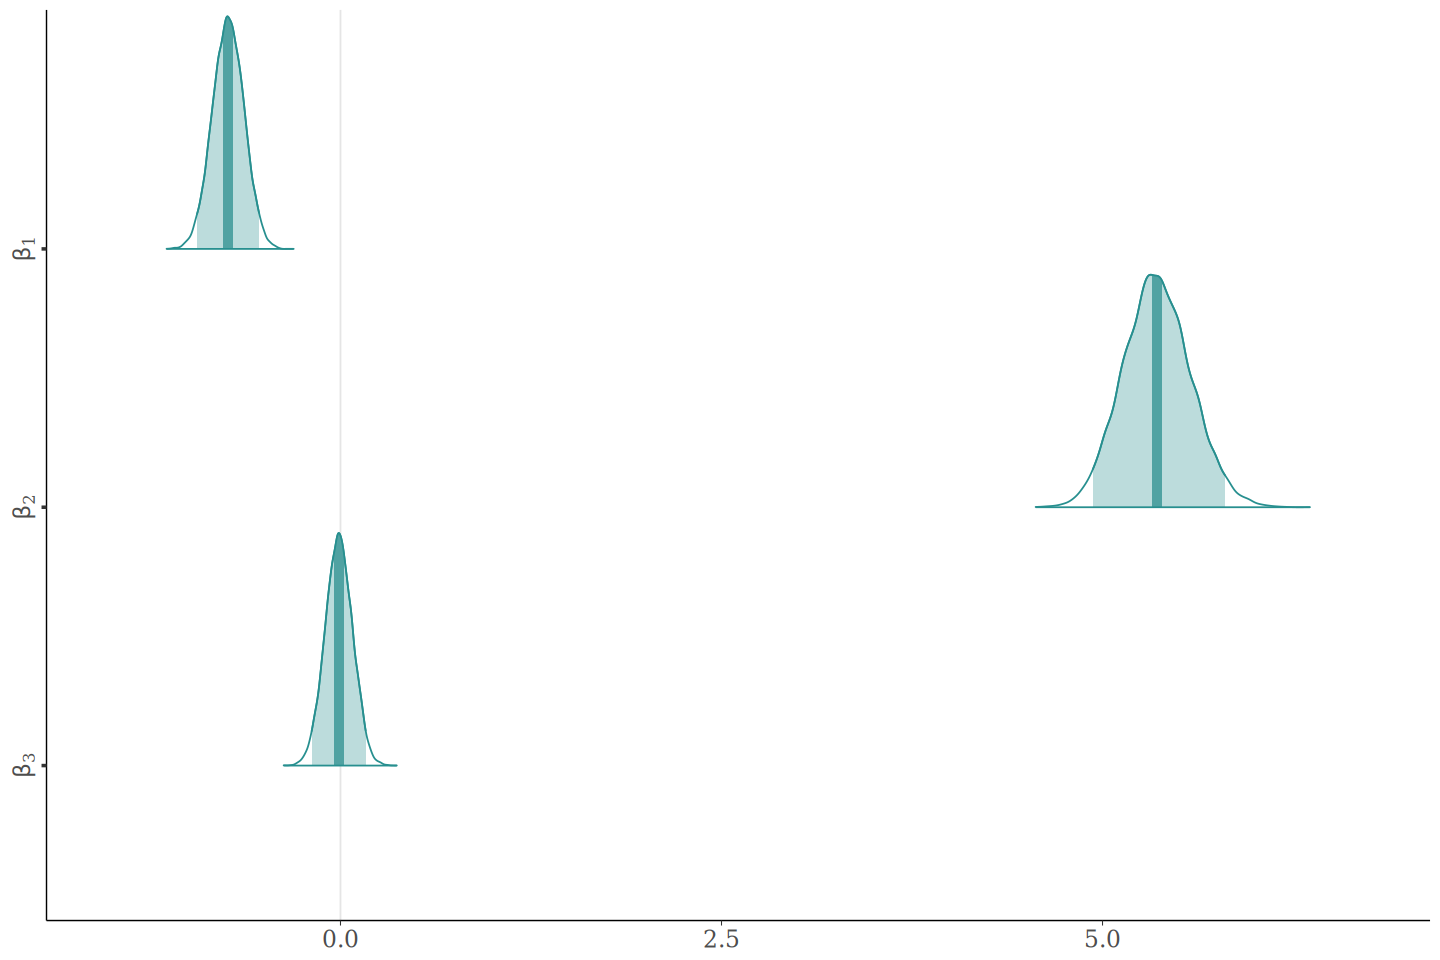

In [99]:
options(repr.plot.width = 12, repr.plot.height = 8)

plot_title <- ggtitle("Distribuciones Posteriores",
                      "con media y 95% HDI")

mcmc_areas_theme <- theme(
    text = element_text(size = 16),           # Cambia todo el texto
    axis.title = element_text(size = 18),     # Título de ejes
    axis.text = element_text(size = 14),      # Etiquetas de ticks
    axis.text.y = element_text(angle = 90, hjust = 0.5, vjust = 0.5),   # Girar las etiquetas del eje Y
    legend.text = element_text(size = 14),    # Texto de leyenda
    legend.title = element_text(size = 16),   # Título de leyenda
    plot.title = element_text(size = 30, face = "bold")  # Título del gráfico
  )
                      
mcmc_areas(fit$draws(), 
           pars = betas_str[1:3], 
           prob_outer = 1, 
           point_est = "mean", 
           prob = 0.95,
           area_method = "equal height") +
           scale_y_discrete(labels = parse(text = rev(betas_str[1:3]))) +
           mcmc_areas_theme

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


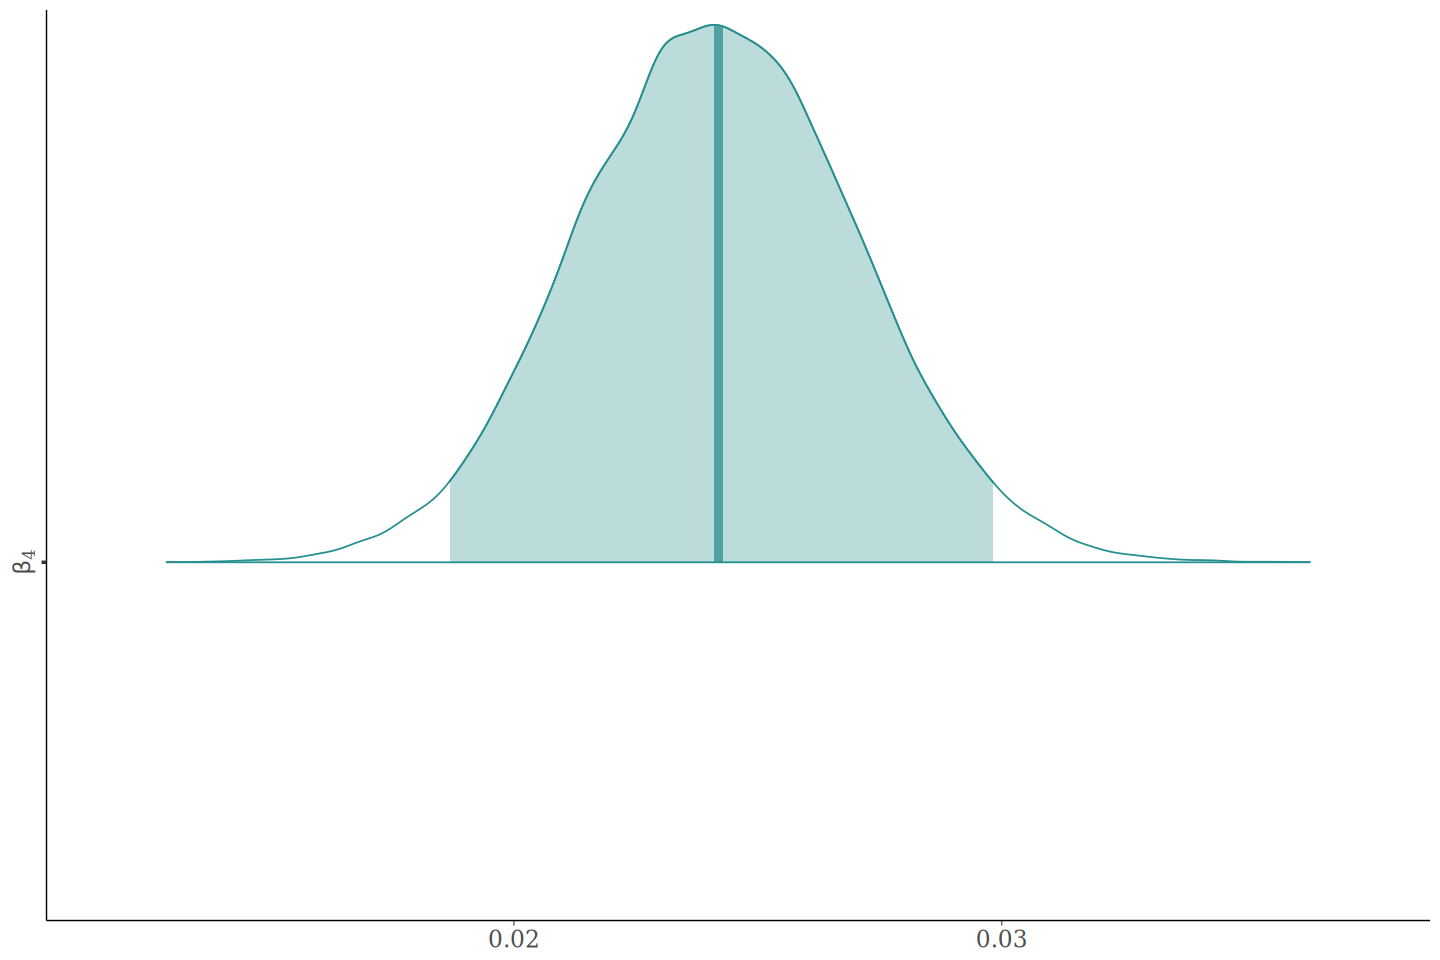

In [100]:
mcmc_areas(fit$draws(), pars = betas_str[4],
            prob_outer = 1, point_est = "mean", prob = 0.95,
            area_method = "equal height") +
            scale_y_discrete(labels = parse(text = rev(betas_str[4]))) +
            mcmc_areas_theme

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


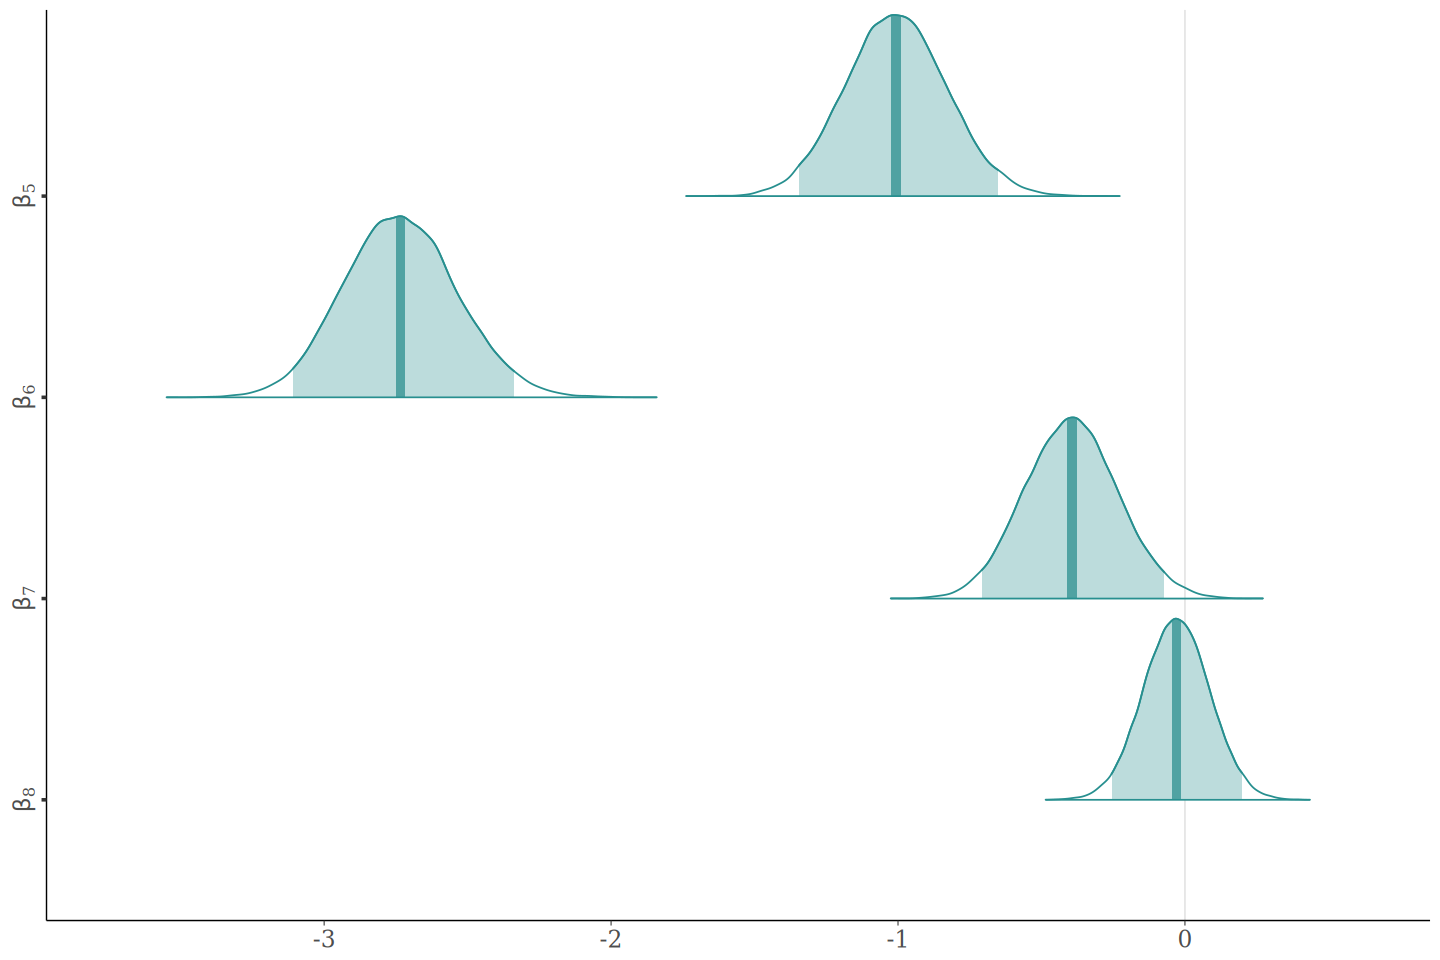

In [101]:
mcmc_areas(fit$draws(), pars = betas_str[5:8],
            prob_outer = 1, point_est = "mean", prob = 0.95,
            area_method = "equal height") +
            scale_y_discrete(labels = parse(text = rev(betas_str[5:8]))) +
            mcmc_areas_theme

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


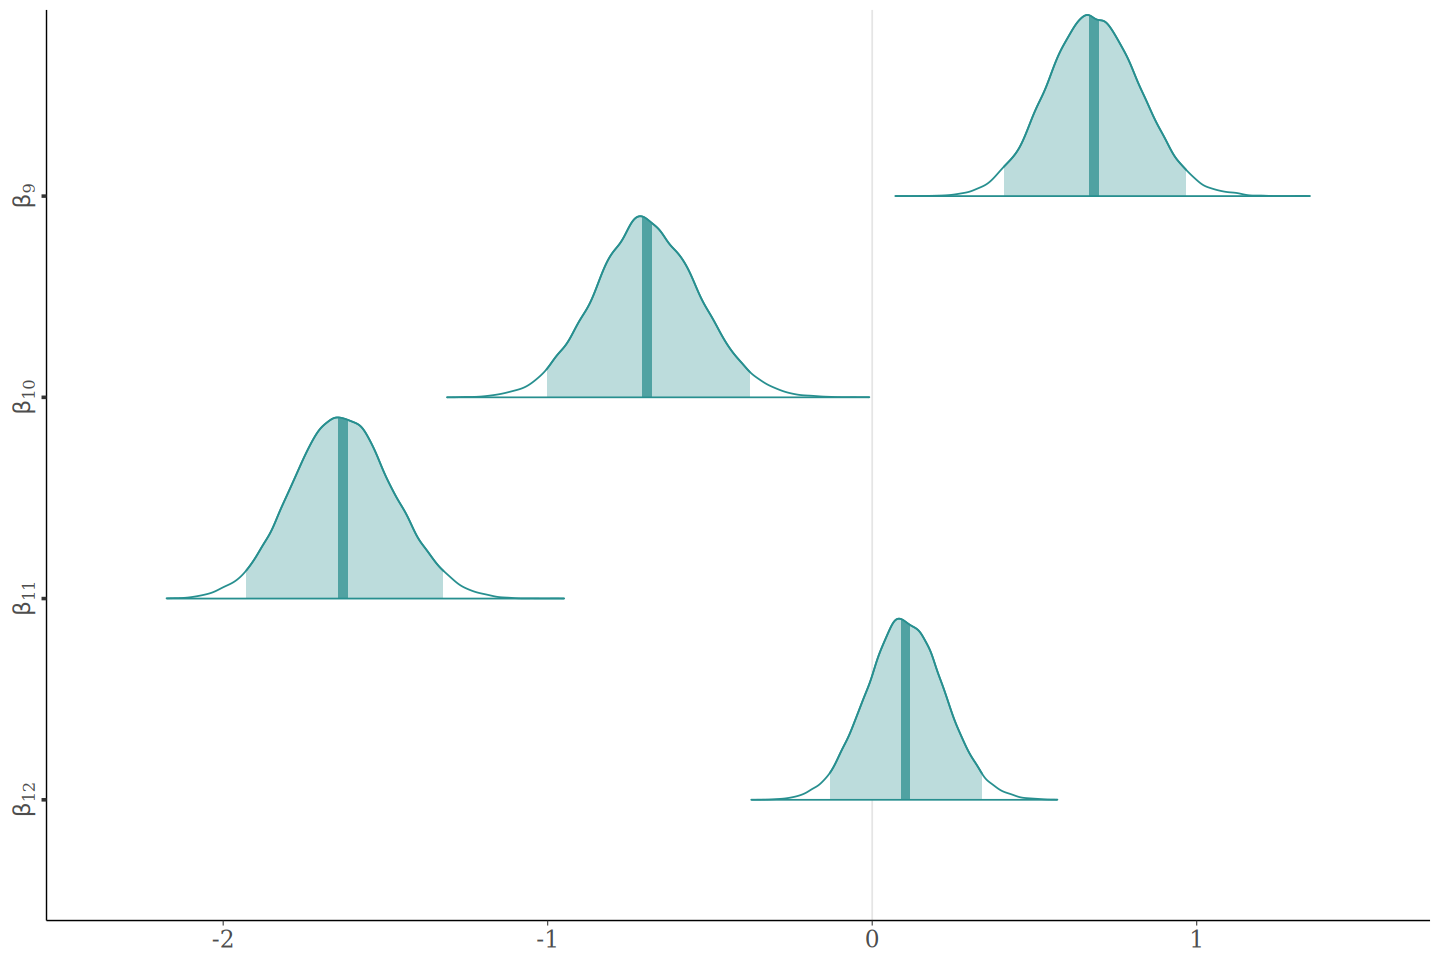

In [102]:
mcmc_areas(fit$draws(), pars = betas_str[9:12],
            prob_outer = 1, point_est = "mean", prob = 0.95,
            area_method = "equal height") +
             scale_y_discrete(labels = parse(text = rev(betas_str[8:12]))) +
             mcmc_areas_theme

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


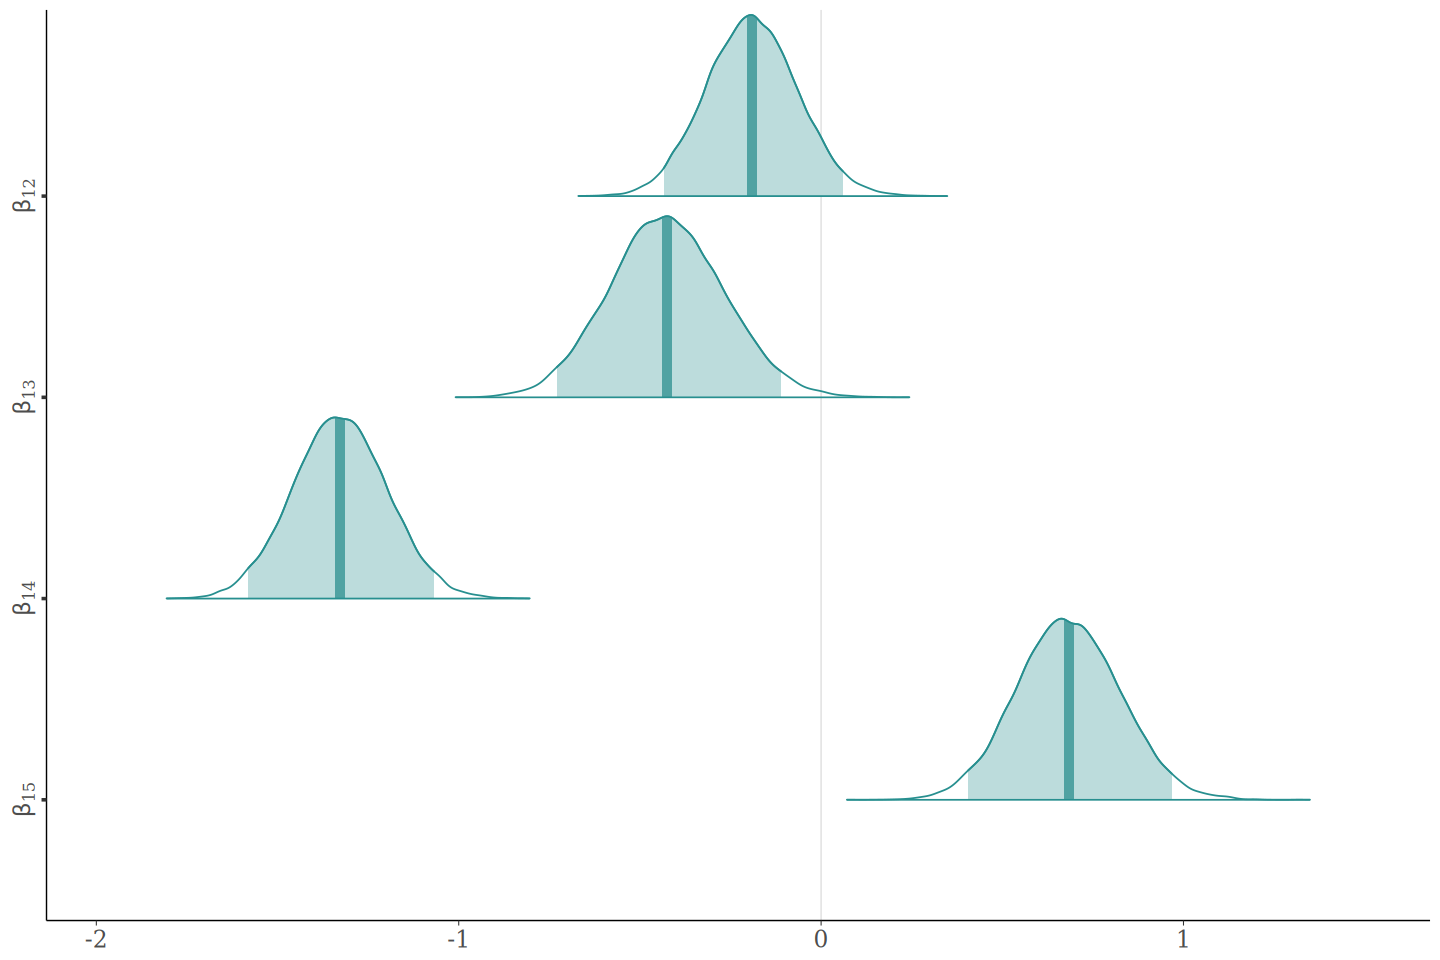

In [103]:
mcmc_areas(fit$draws(), pars = betas_str[12:15],
            prob_outer = 1, point_est = "mean", prob = 0.95,
            area_method = "equal height") +
            scale_y_discrete(labels = parse(text = rev(betas_str[12:15]))) +
            mcmc_areas_theme

### Cadenas

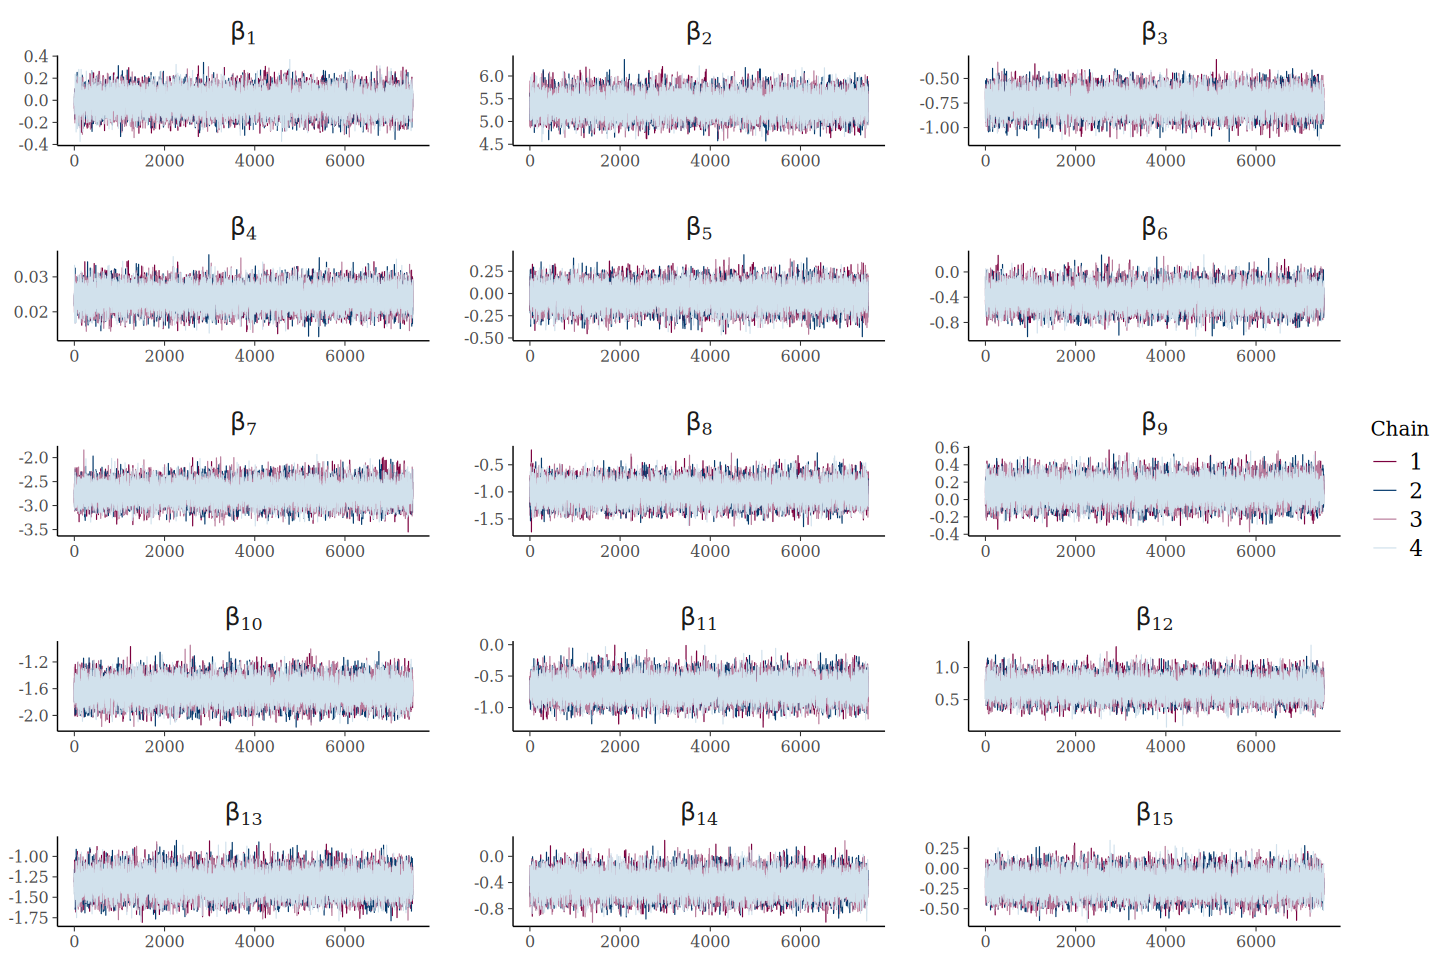

In [65]:
 color_scheme_set("mix-blue-pink")

 p <- mcmc_trace(
    fit$draws(), pars = betas_str,
    facet_args = list(nrow = 5, ncol = 3, labeller = label_parsed)
 )
 p + facet_text(size = 15)

### Correlación entre Betas

In [ ]:
samples_df <- fit$draws(variables = "beta", format = "df") # or format="array"

samples_df <- samples_df %>% select(-c(.chain, .iteration, .draw))

# Calcular la matriz de correlación
cor_matrix <- cor(samples_df)

# Convertir la matriz de correlación a formato largo
cor_melt <- melt(cor_matrix)

Warning message:
“Dropping 'draws_df' class as required metadata was removed.”


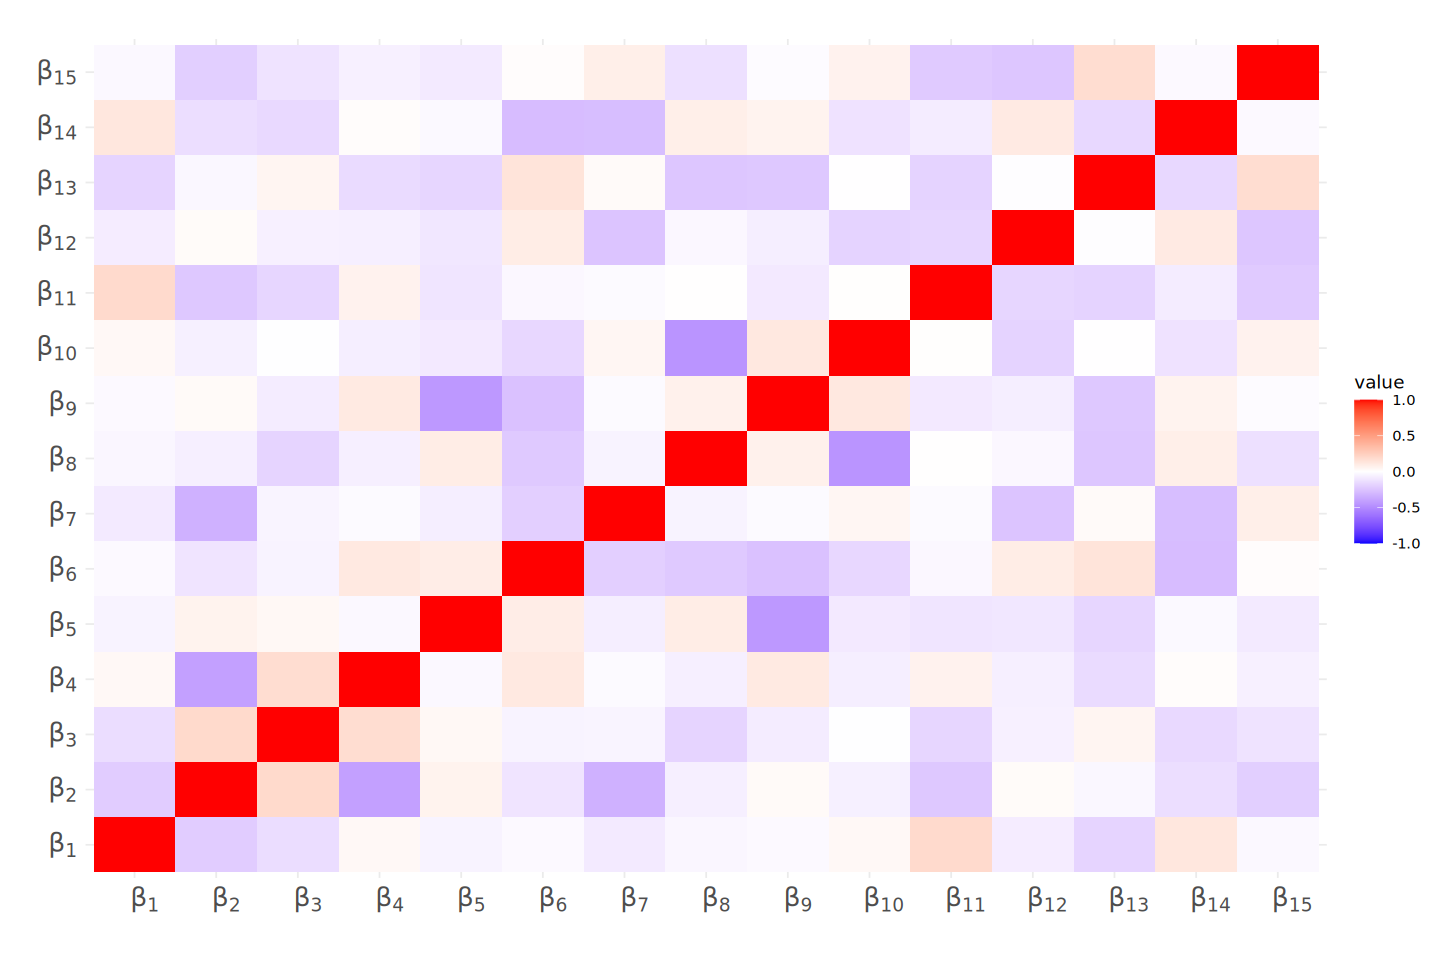

In [151]:
# Graficar Corr Plot
ggplot(cor_melt, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", 
                        mid = "white", midpoint = 0, 
                        limits = c(-1, 1)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.15),
        axis.title = element_text(size = 18),     # Título de ejes
        axis.text = element_text(size = 16)) +
  labs(title = "", x = "", y = "") + 
  scale_y_discrete(labels = parse(text = betas_str)) + 
  scale_x_discrete(labels = parse(text = betas_str))

### Posteriores Conjuntas

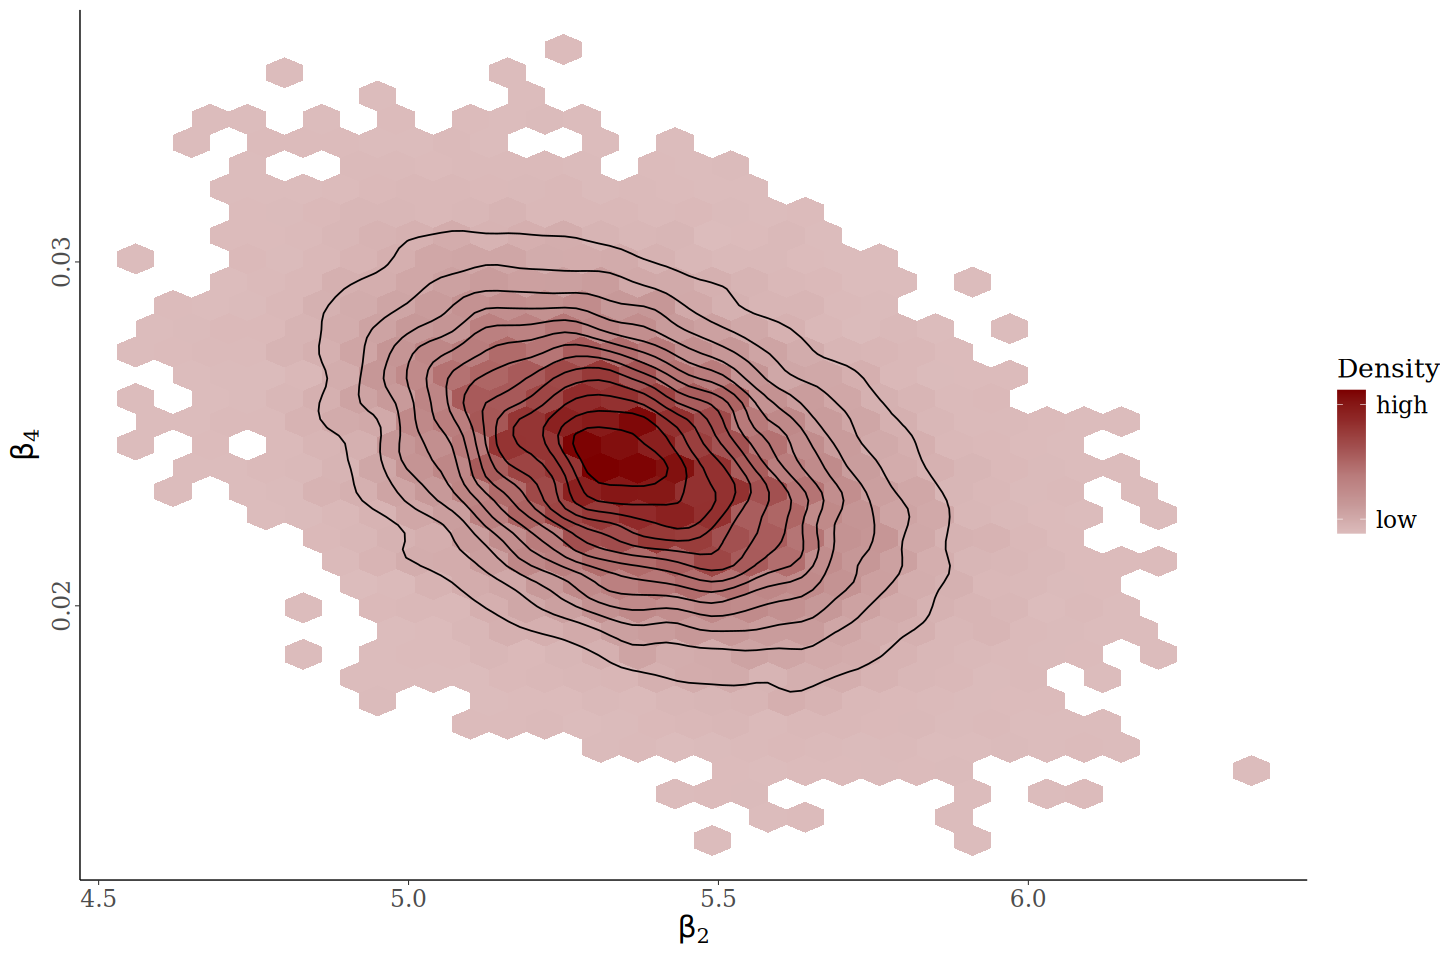

In [136]:
color_scheme_set("red")
mcmc_hex(fit$draws(), pars = c(betas_str[2], betas_str[4])) + 
    stat_density_2d(color = "black", linewidth = .5) + 
    labs(
        x = parse(text = betas_str[2]),
        y = parse(text = betas_str[4])
    ) + 
    mcmc_areas_theme


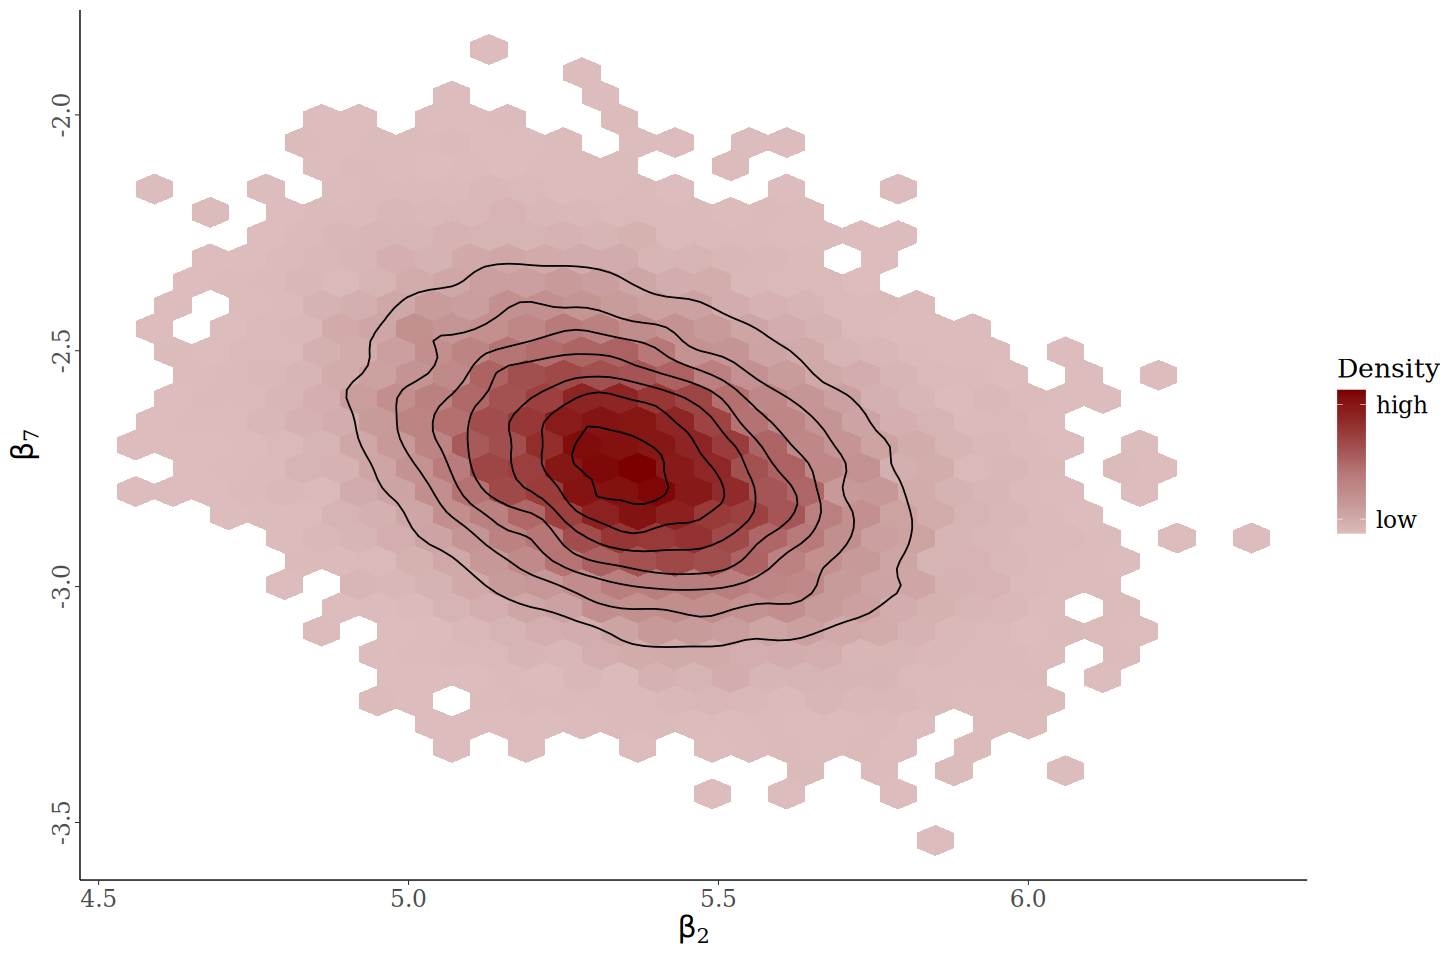

In [137]:
mcmc_hex(fit$draws(), pars = c(betas_str[2], betas_str[7])) + 
    stat_density_2d(color = "black", linewidth = .5) + 
    labs(
        x = parse(text = betas_str[2]),
        y = parse(text = betas_str[7])
    ) + mcmc_areas_theme

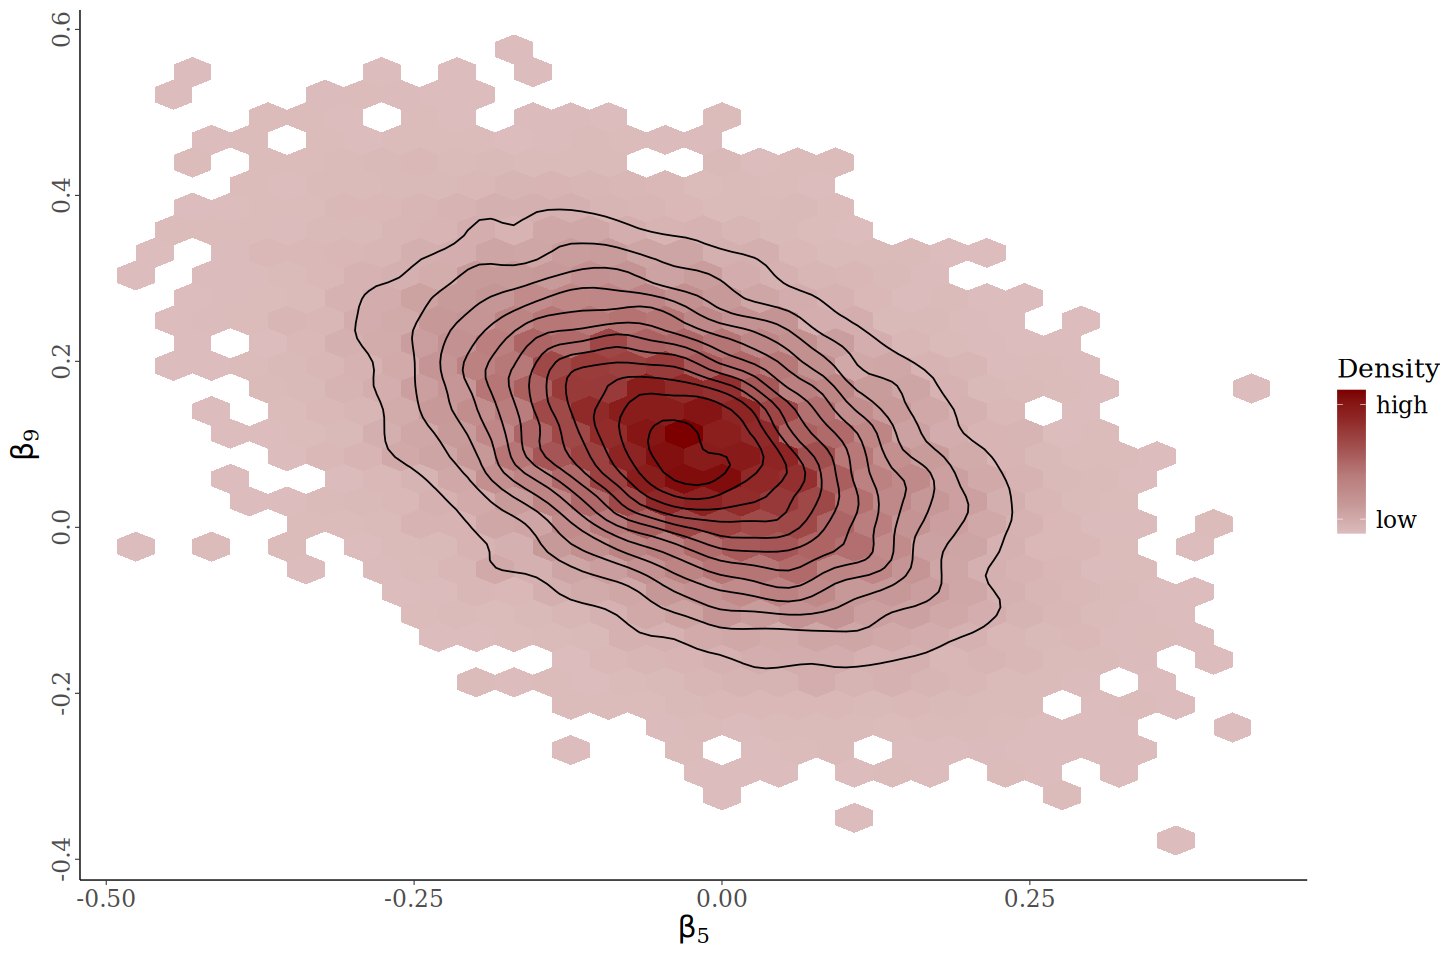

In [138]:
mcmc_hex(fit$draws(), pars = c(betas_str[5], betas_str[9])) + 
    stat_density_2d(color = "black", linewidth = .5) + 
    labs(
        x = parse(text = betas_str[5]),
        y = parse(text = betas_str[9])
    ) + mcmc_areas_theme

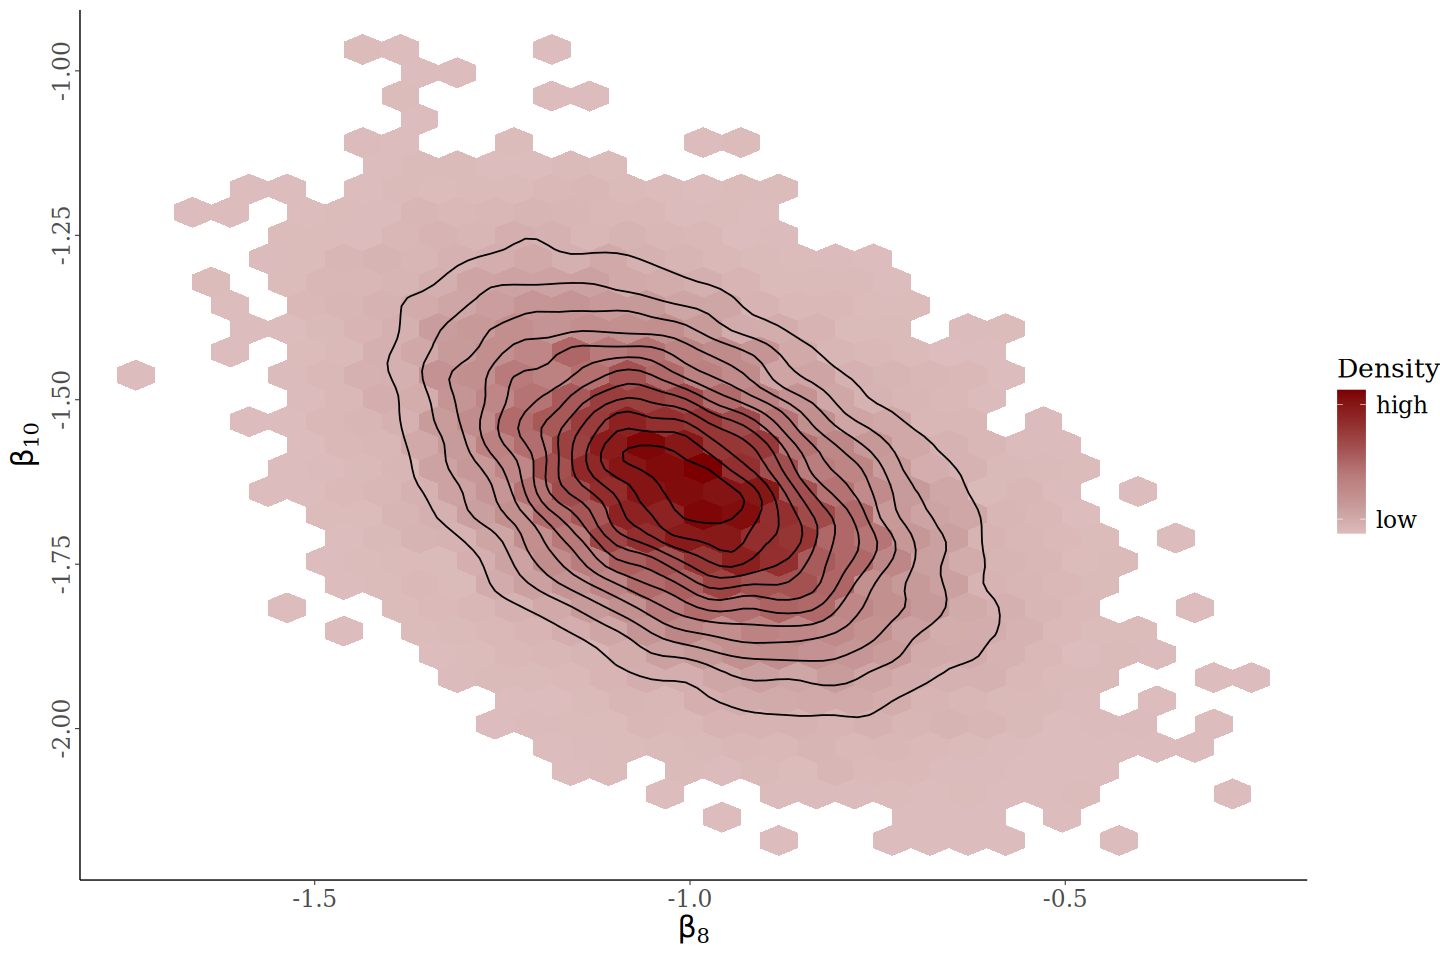

In [140]:
mcmc_hex(fit$draws(), pars = c(betas_str[8], betas_str[10])) + 
    stat_density_2d(color = "black", linewidth = .5) + 
    labs(
        x = parse(text = betas_str[8]),
        y = parse(text = betas_str[10])
    ) + mcmc_areas_theme

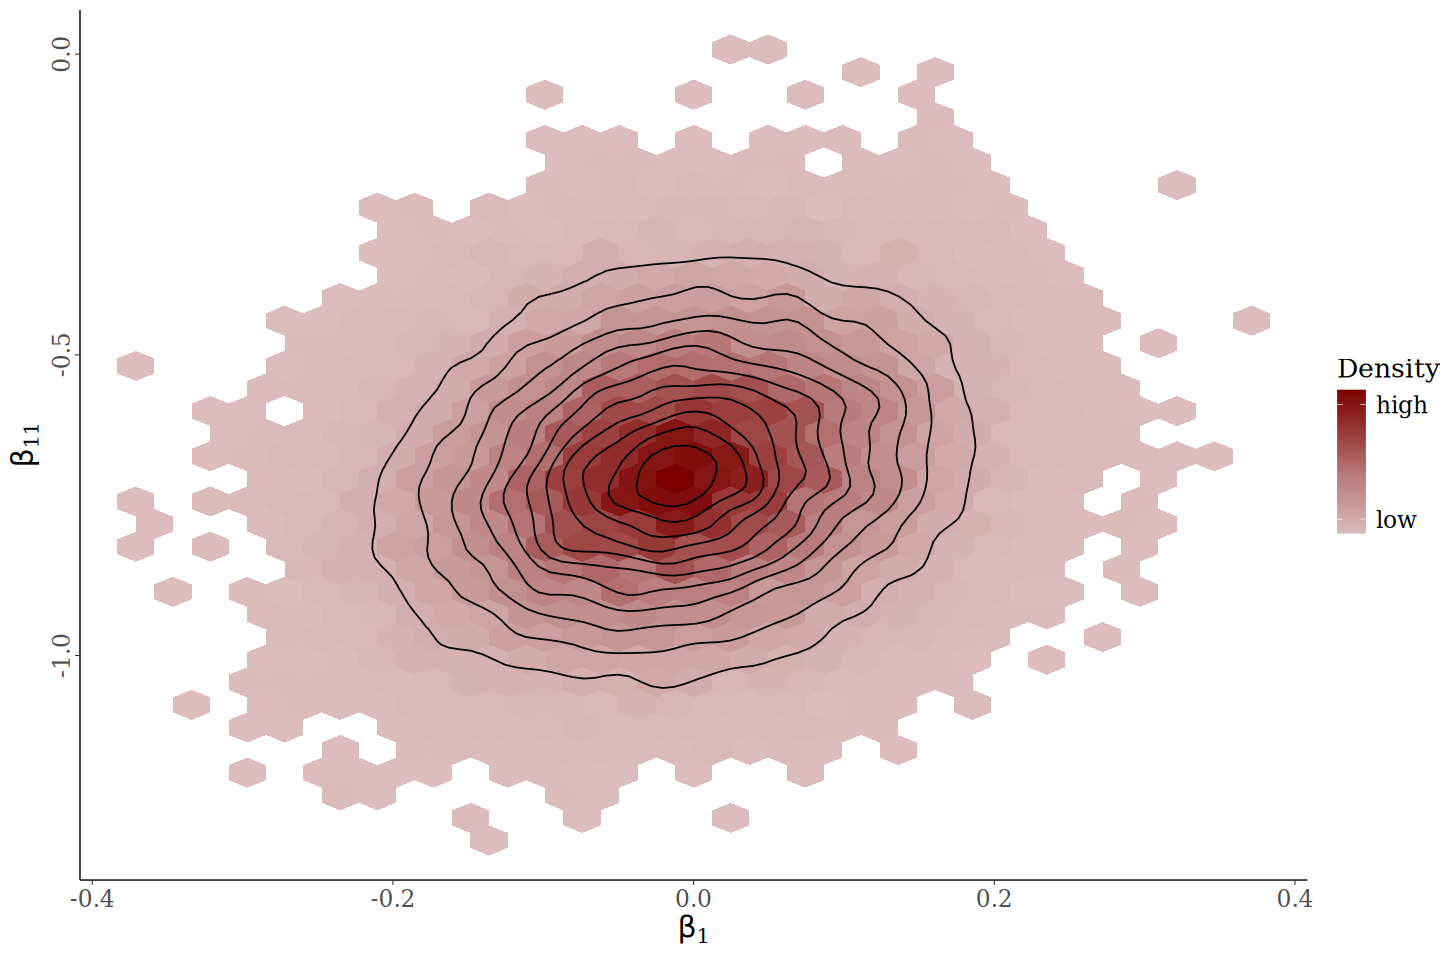

In [141]:
mcmc_hex(fit$draws(), pars = c(betas_str[1], betas_str[11])) + 
    stat_density_2d(color = "black", linewidth = .5) + 
    labs(
        x = parse(text = betas_str[1]),
        y = parse(text = betas_str[11])
    ) + mcmc_areas_theme

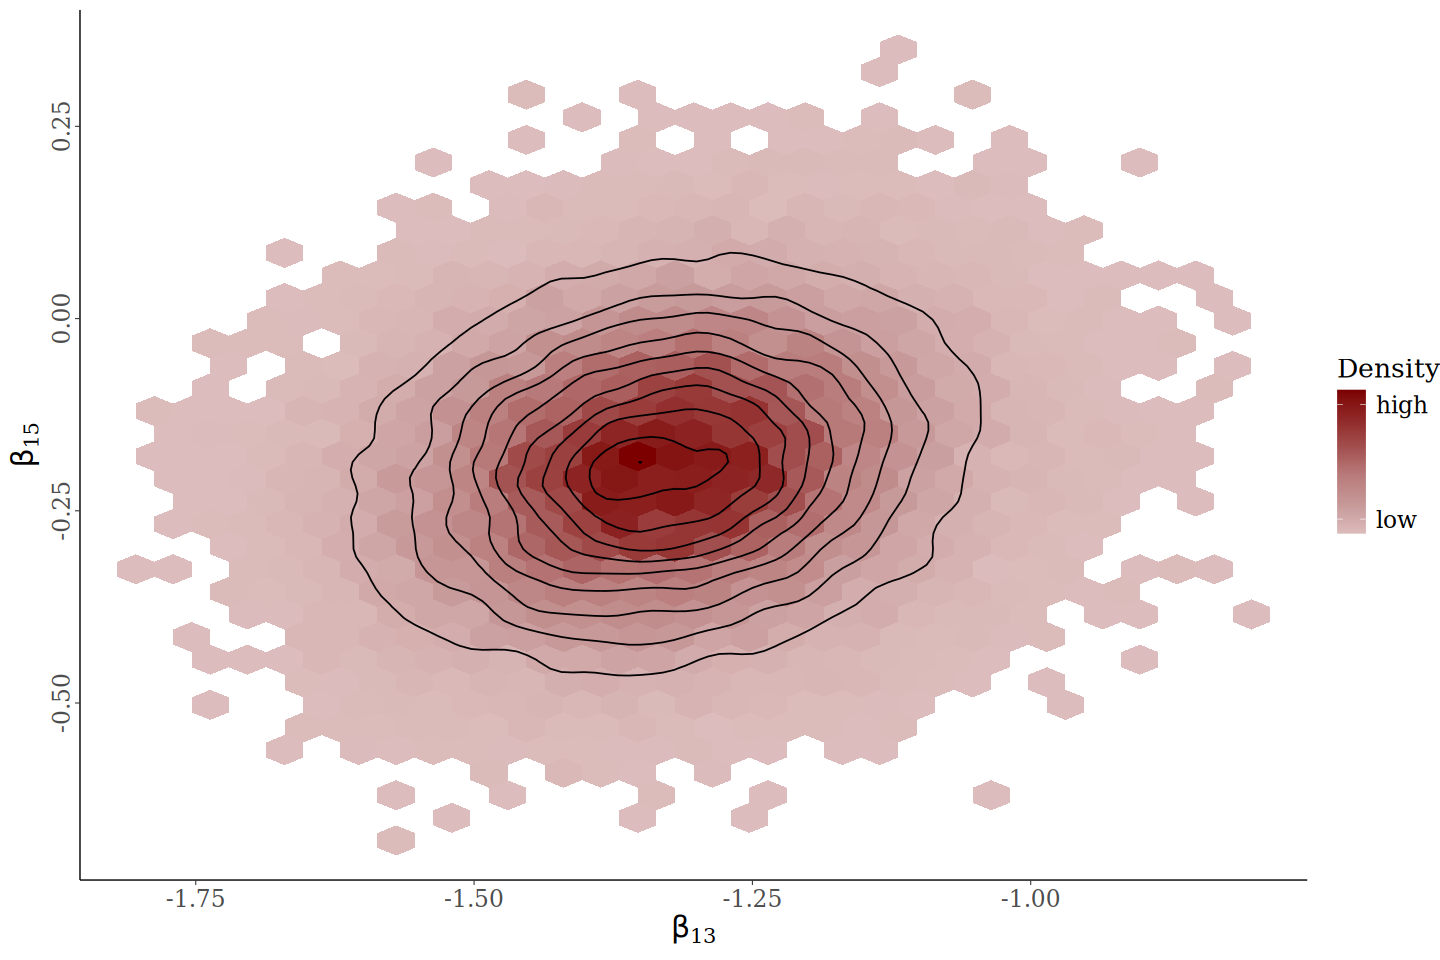

In [142]:
mcmc_hex(fit$draws(), pars = c(betas_str[13], betas_str[15])) + 
    stat_density_2d(color = "black", linewidth = .5) + 
    labs(
        x = parse(text = betas_str[13]),
        y = parse(text = betas_str[15])
    ) + mcmc_areas_theme

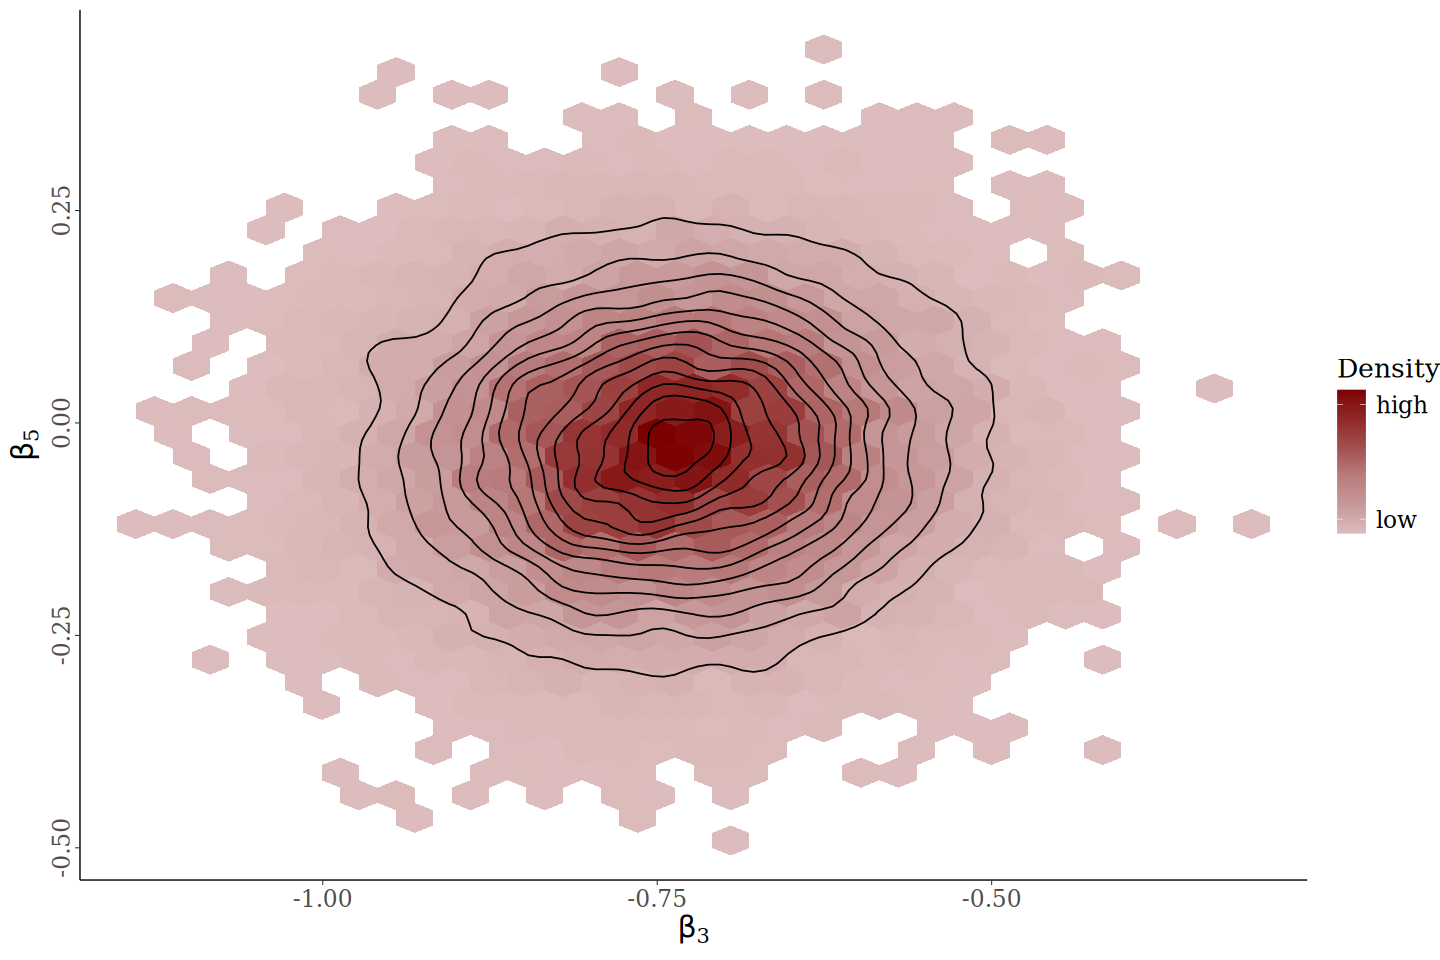

In [143]:
mcmc_hex(fit$draws(), pars = c(betas_str[3], betas_str[5])) + 
    stat_density_2d(color = "black", linewidth = .5) + 
    labs(
        x = parse(text = betas_str[3]),
        y = parse(text = betas_str[5])
    ) + mcmc_areas_theme

## Modelo de Cox (Riesgos Proporcionales).

In [49]:
# Tiempos para datos no censurados
data_ord <- data_ord %>%
            arrange(desc(tiempo))

tiempo.no.cen <- data_ord %>%
                    filter(defuncion == 1) %>%
                    select(tiempo) %>%
                    as.vector() %>%
                    unname() %>%
                    unlist()

tiempo.cen <- data_ord %>%
                    filter(defuncion == 0) %>%
                    select(tiempo) %>%
                    as.vector() %>%
                    unname() %>%
                    unlist()

cov.no.cen <- data_ord %>%
                    filter(defuncion == 1) %>%
                    select(-c(tiempo, defuncion))

cov.cen <- data_ord %>%
                    filter(defuncion == 0) %>%
                    select(-c(tiempo, defuncion))
# Number of cov
K <- dim(cov.cen)[2]

# N no censurados
N <- dim(cov.no.cen)[1]

# N censurados
N_cen <- dim(cov.cen)[1]

In [50]:
head(data_ord)

,sexo,tipo_paciente,neumonia,edad,diabetes,epoc,asma,inmusupr,hipertension,otra_com,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,defuncion,tiempo
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2,1,2,35,2,2,2,2,2,2,2,2,2,2,2,0,364
2,2,1,2,36,2,2,2,2,2,2,2,2,2,2,2,0,364
3,1,1,2,44,2,2,2,2,2,2,2,2,2,2,1,0,364
4,2,1,2,26,2,2,2,2,2,2,2,2,2,2,2,0,364
5,2,1,2,15,2,2,2,2,2,2,2,2,2,2,2,0,364
6,2,1,2,24,2,2,2,2,2,2,2,2,2,2,2,0,364


In [51]:
write(
'
data {
  int<lower=0> K;          // num covariates

  int<lower=0> N;          // num uncensored obs
  vector[N] t;             // event time (non-strict decreasing)
  matrix[N, K] x;          // covariates for uncensored obs

  int<lower=0> N_c;        // num censored obs
  vector[N_c] t_c;   // censoring time
  matrix[N_c, K] x_c;      // covariates for censored obs
}
parameters {
  vector[K] beta;          // slopes (no intercept)
}
model {
  beta ~ normal(0, 2);

  vector[N] log_theta = x * beta; // uncensored data
  vector[N_c] log_theta_c = x_c * beta; // censored data

  real log_denom = log_sum_exp(log_theta_c); // hazard set

  for (n in 1:N) {
    log_denom = log_sum_exp(log_denom, log_theta[n]);
    target += log_theta[n] - log_denom;   // log likelihood
  }
}
'
, file = "propo_hazard.stan"
)

In [52]:
model_cox <- cmdstan_model(stan_file = "propo_hazard.stan")

In [53]:
data_list <- list(
    N = N,
    t = tiempo.no.cen,
    N_c = N_cen,
    t_c = tiempo.cen,
    K = K,
    x = cov.no.cen,
    x_c = cov.cen
)

In [56]:
fit <- model_cox$sample(
    data = data_list,
    chains = 4,
    seed = 27386589,
    refresh = 100,
    parallel_chains = 4,
    iter_warmup = 2500,
    iter_sampling = 25000,
    save_warmup = T
)

Running MCMC with 4 parallel chains...

Chain 1 Iteration:     1 / 27500 [  0%]  (Warmup) 
Chain 2 Iteration:     1 / 27500 [  0%]  (Warmup) 
Chain 3 Iteration:     1 / 27500 [  0%]  (Warmup) 
Chain 4 Iteration:     1 / 27500 [  0%]  (Warmup) 
Chain 1 Iteration:   100 / 27500 [  0%]  (Warmup) 
Chain 1 Iteration:   200 / 27500 [  0%]  (Warmup) 
Chain 1 Iteration:   300 / 27500 [  1%]  (Warmup) 
Chain 3 Iteration:   100 / 27500 [  0%]  (Warmup) 
Chain 1 Iteration:   400 / 27500 [  1%]  (Warmup) 
Chain 1 Iteration:   500 / 27500 [  1%]  (Warmup) 
Chain 1 Iteration:   600 / 27500 [  2%]  (Warmup) 
Chain 2 Iteration:   100 / 27500 [  0%]  (Warmup) 
Chain 3 Iteration:   200 / 27500 [  0%]  (Warmup) 
Chain 4 Iteration:   100 / 27500 [  0%]  (Warmup) 
Chain 1 Iteration:   700 / 27500 [  2%]  (Warmup) 
Chain 3 Iteration:   300 / 27500 [  1%]  (Warmup) 
Chain 1 Iteration:   800 / 27500 [  2%]  (Warmup) 
Chain 3 Iteration:   400 / 27500 [  1%]  (Warmup) 
Chain 4 Iteration:   200 / 27500 [  0%]  (

In [57]:
fit$summary()

variable,mean,median,sd,mad,q5,q95,rhat,ess_bulk,ess_tail
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lp__,-2.520324e+03,-2.520000e+03,2.755338520,2.668680000,-2.525350e+03,-2.516430e+03,1.0001057,41214.6,61630.07
beta[1],4.878798e-02,4.892235e-02,0.098493750,0.098846721,-1.123940e-01,2.109562e-01,1.0000162,180243.4,77930.91
beta[2],7.597658e+00,7.528110e+00,0.749319453,0.727408038,6.499496e+00,8.943782e+00,1.0001078,177479.0,69091.42
beta[3],-2.521900e-01,-2.513880e-01,0.101407019,0.100998418,-4.198391e-01,-8.575324e-02,1.0000123,180579.7,78283.96
beta[4],1.875975e-02,1.874645e-02,0.002908379,0.002901745,1.400449e-02,2.359158e-02,1.0000422,199261.0,81405.32
beta[5],1.014555e-02,9.415960e-03,0.109086070,0.109195343,-1.684373e-01,1.896251e-01,0.9999907,158680.1,86054.44
beta[6],3.448867e-01,3.402685e-01,0.201798074,0.200768503,2.123172e-02,6.846352e-01,0.9999916,167550.0,79619.85
beta[7],-4.624252e-02,-7.491190e-02,0.469271968,0.463721549,-7.663524e-01,7.719649e-01,1.0001238,170863.8,74584.96
beta[8],-1.465935e-01,-1.523600e-01,0.220942992,0.221186129,-4.992306e-01,2.269111e-01,1.0000052,181304.4,80580.46


In [59]:
fit$cmdstan_diagnose()

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete, no problems detected.


In [60]:
# Guardamos el Muestreo
fit$save_object("cox_model_draws.RDS")

In [ ]:
betas_str <- character(length = K)

for (i in 1:K) {
   betas_str[i] <- paste("beta[", i, "]", sep = "")
}

[1] "beta[1]"  "beta[2]"  "beta[3]"  "beta[4]"  "beta[5]"  "beta[6]" 
 [7] "beta[7]"  "beta[8]"  "beta[9]"  "beta[10]" "beta[11]" "beta[12]"
[13] "beta[13]" "beta[14]" "beta[15]"

## Visualizaciones

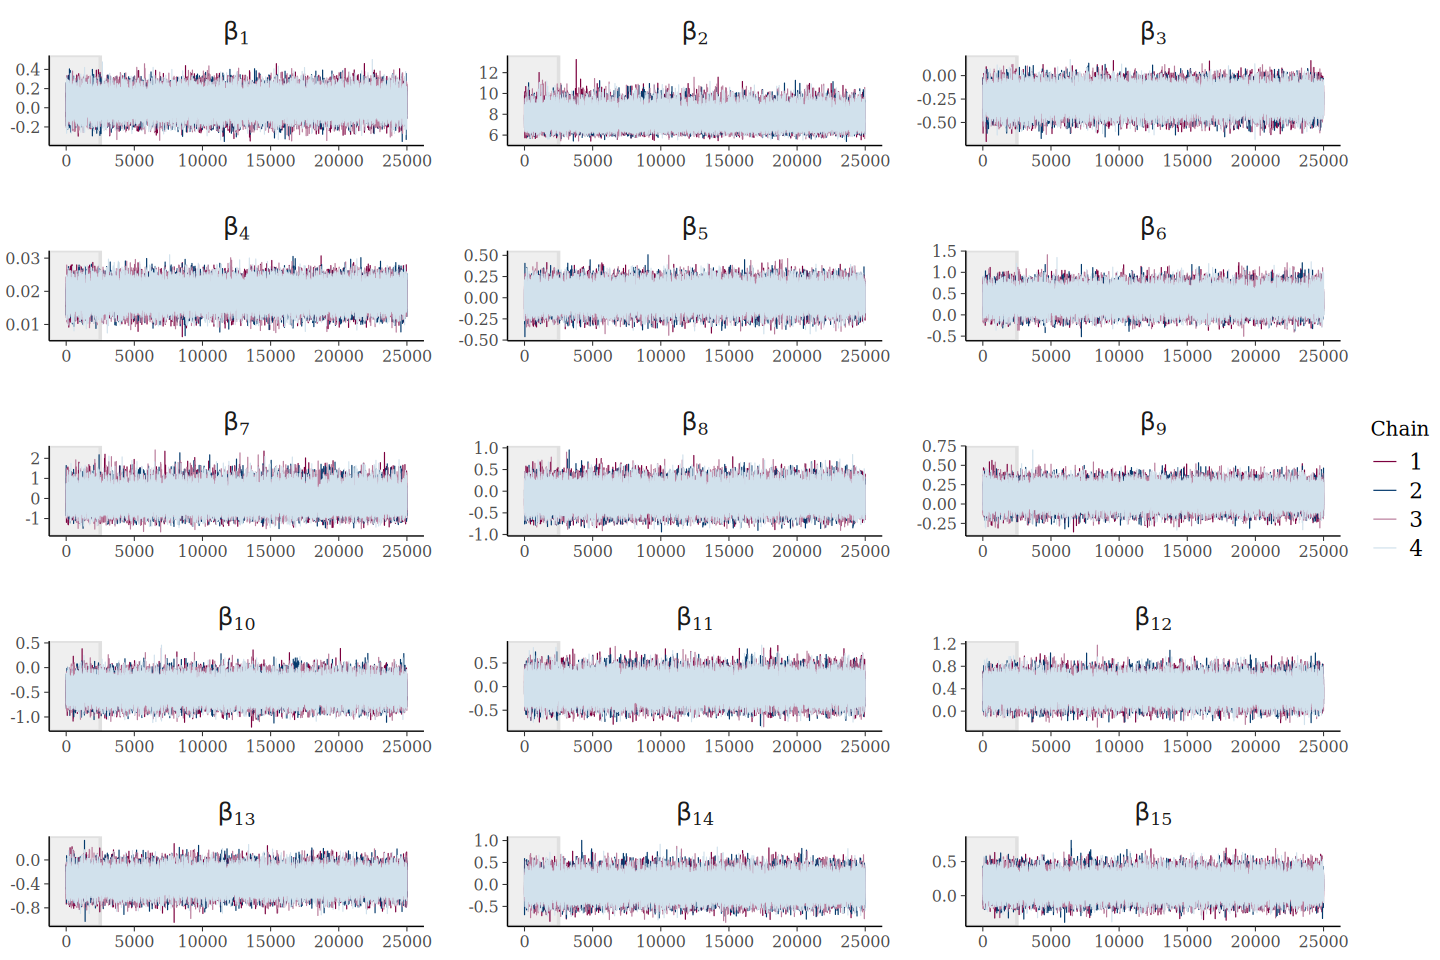

In [64]:
options(repr.plot.width = 12, repr.plot.height = 8)

color_scheme_set("mix-blue-pink")

 p <- mcmc_trace(
    fit$draws(), pars = betas_str,
    n_warmup = 2500,
    facet_args = list(nrow = 5, ncol = 3, labeller = label_parsed)
 )
 p + facet_text(size = 15)

### Posteriores

In [90]:
mcmc_intervals_theme <- theme(
    text = element_text(size = 16),           # Cambia todo el texto
    axis.title = element_text(size = 18),     # Título de ejes
    axis.text = element_text(size = 14),      # Etiquetas de ticks
    axis.text.y = element_text(angle = 0, hjust = 0.5, vjust = 0.5),   # Girar las etiquetas del eje Y
    legend.text = element_text(size = 14),    # Texto de leyenda
    legend.title = element_text(size = 16),   # Título de leyenda
    plot.title = element_text(size = 30, face = "bold")  # Título del gráfico
  )

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


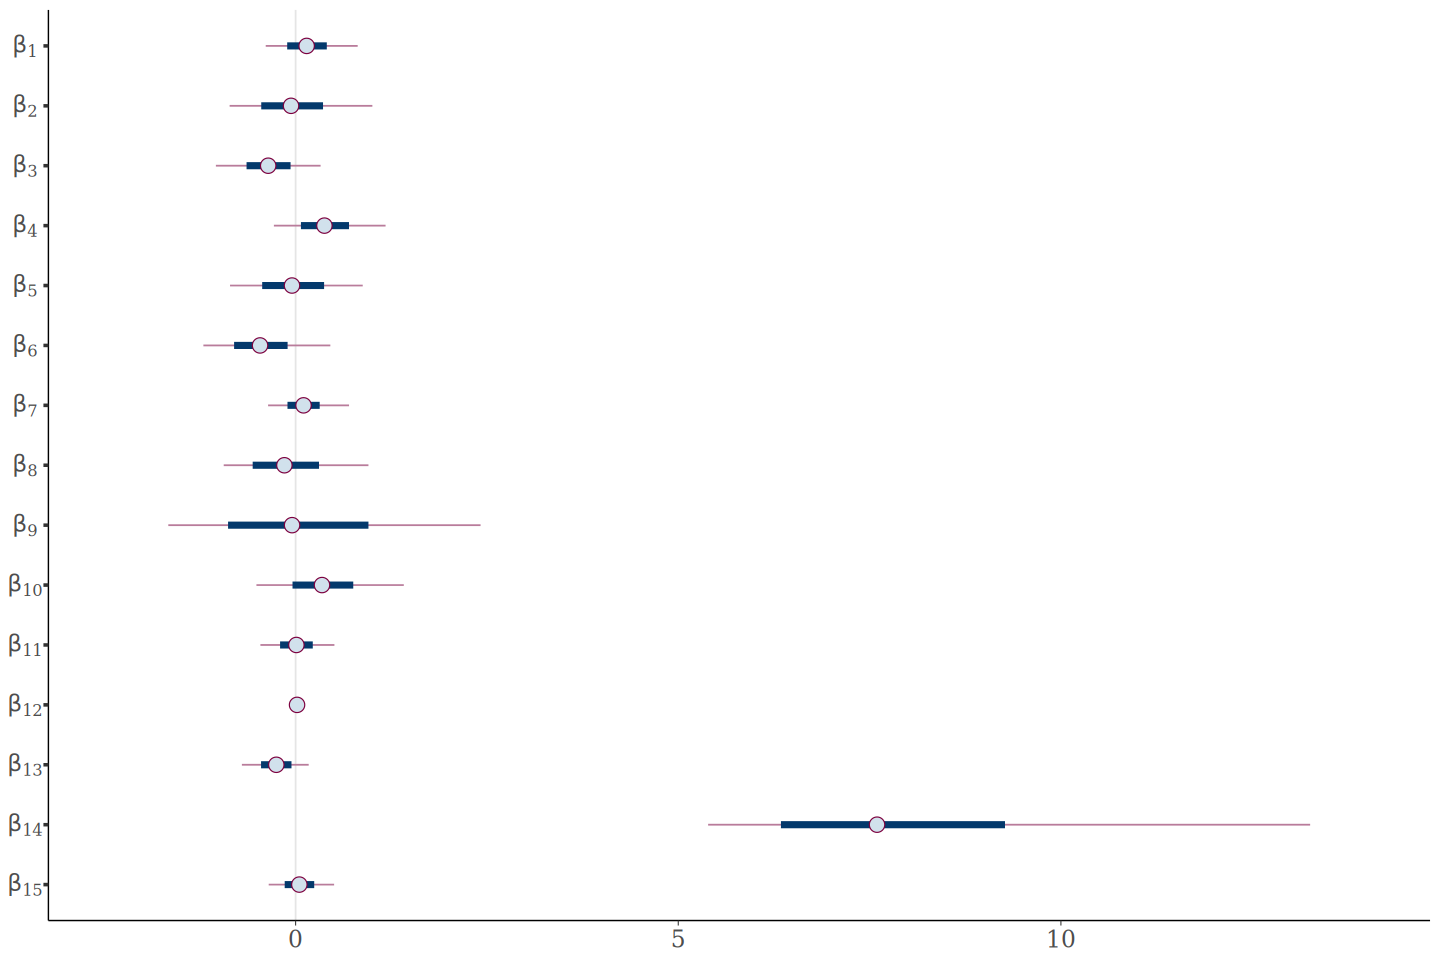

In [91]:
mcmc_intervals(
    fit$draws(),
    pars = betas_str,
    point_est = "mean", prob = 0.95, prob_outer = 1) + 
    scale_y_discrete(labels = parse(text = rev(betas_str))) +
    mcmc_intervals_theme

In [99]:
samples_df <- fit$draws(variables = "beta", format = "df") # or format="array"

samples_df <- samples_df %>% select(-c(.chain, .iteration, .draw))

# Calcular la matriz de correlación
cor_matrix <- cor(samples_df)

# Convertir la matriz de correlación a formato largo
cor_melt <- melt(cor_matrix)

Warning message:
“Dropping 'draws_df' class as required metadata was removed.”


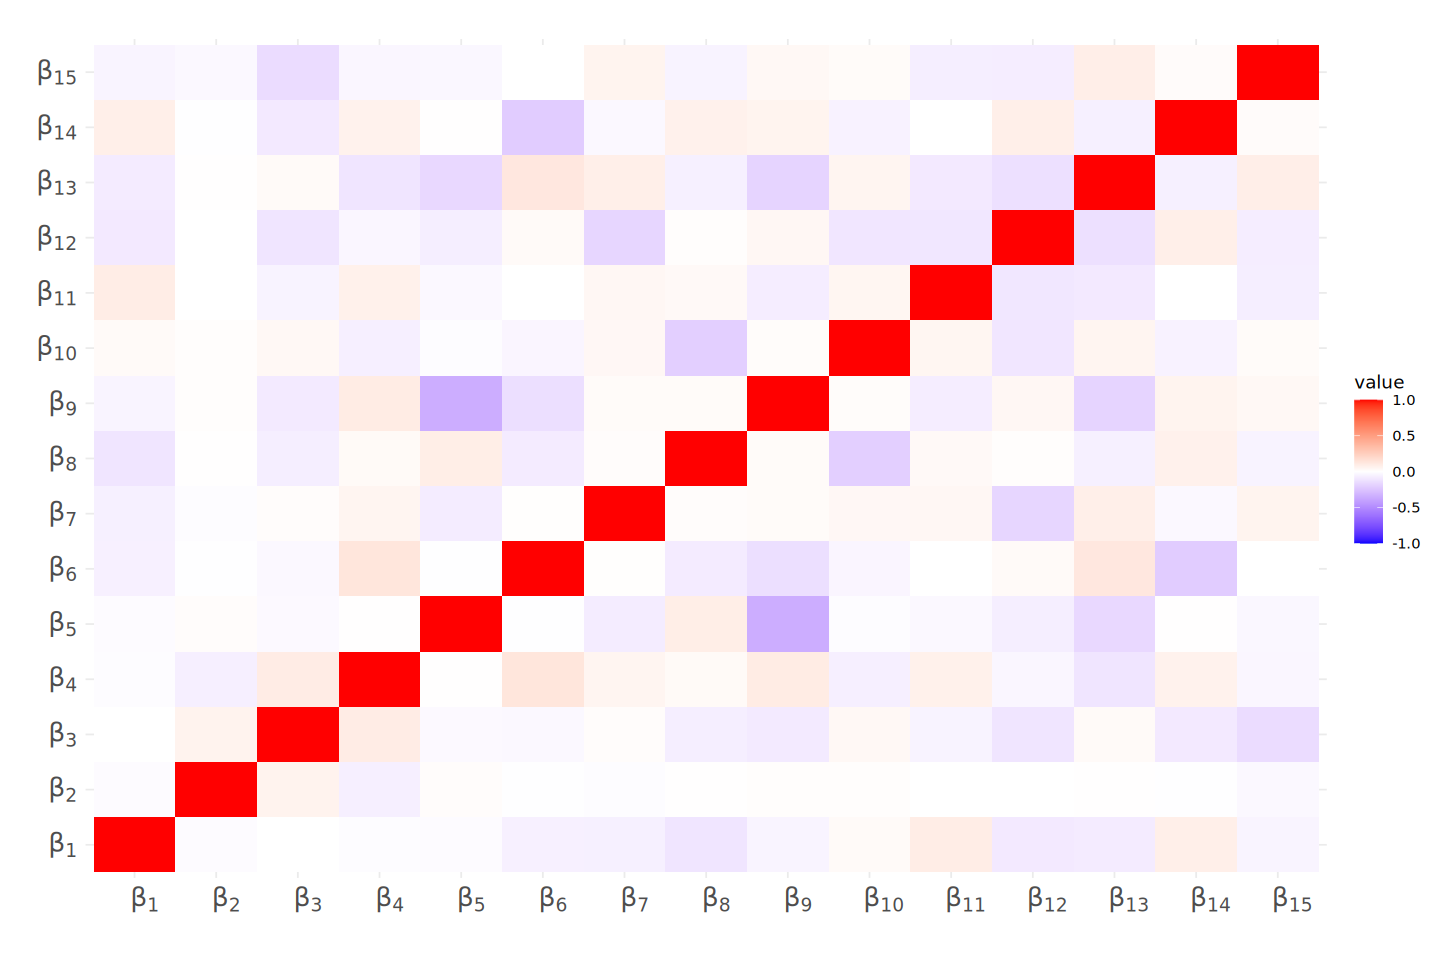

In [100]:
# Graficar Corr Plot
ggplot(cor_melt, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", 
                        mid = "white", midpoint = 0, 
                        limits = c(-1, 1)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.15),
        axis.title = element_text(size = 18),     # Título de ejes
        axis.text = element_text(size = 16)) +
  labs(title = "", x = "", y = "") + 
  scale_y_discrete(labels = parse(text = betas_str)) + 
  scale_x_discrete(labels = parse(text = betas_str))